# Tausworthe Generator Project

### Kaitlyn Boyle

Import required libraries

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import statistics
import numpy as np
from scipy.stats import norm

Define the Tausworthe generator. This will produce a string of 0's and 1's that will then be converted to uniform random numbers. We use large r and q to create the binary string. 

In [12]:
def taus_period(r, q):
    #initialize 1-q binary sequence of 1s
    initial = '1'*q
    #for storing the binary string
    full = initial 
    #k in the length of the final string
    k = (2**q)-1
    y = q + 1
    #find the next binary number
    for x in range(k):
        bi = int(full[y-r-1]) + int(full[y-q-1])
        new = bi%2
        full = full + str(new)
        y += 1
    #return the full, 2^q binary string 
    return full
g = taus_period(23, 29)
len(g)

53687091 10
107374182 20
161061273 30
214748364 40
268435455 50
322122546 60
375809637 70
429496728 80
483183819 90
536870910 100


536870940

Convert the binary string to uniform random numbers using a specified l value. Store the PRNs in a list. 

In [15]:
#function to convert the binary string to Unif(0,1) numbers 
def convert(l):
    n = len(g)
    y = l
    x = 0
    #store PRNs
    randoms = []
    #convert l binary digits to a Unif(0,1) number
    while y < n+1:
        if y == n:
            l_str = g[x:]
        else:
            l_str = g[x:y]
        x += l
        y += l
        convert_b = int(l_str, base=2)
        prn = convert_b/(2**l)
        randoms.append(prn)
    #return list of PRNs
    return randoms
prns = convert(19)
prns[0:20]

[0.9999980926513672,
 0.9990234375,
 5.91278076171875e-05,
 0.5000019073486328,
 0.99951171875,
 0.12307548522949219,
 0.7578105926513672,
 0.9997482299804688,
 1.52587890625e-05,
 0.12109375,
 0.5154991149902344,
 0.03173065185546875,
 0.05865287780761719,
 0.9998149871826172,
 0.9687614440917969,
 0.095672607421875,
 0.3750286102294922,
 0.9769287109375,
 0.9858245849609375,
 0.2499217987060547]

## Checking for Uniform Distribution

Check if the PRNs are uniformly distributed. Plot the histogram of the generated pseudo-random numbers.

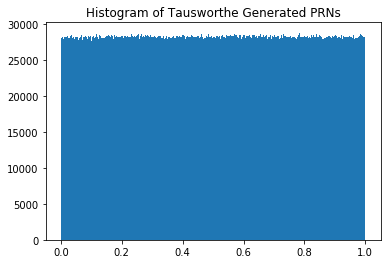

In [69]:
#histogram of all PRNs produced from generator
plt.hist(prns, 1000)
plt.title("Histogram of Tausworthe Generated PRNs")
plt.show()

Plot pairs of (Ui-1, Ui) PRNs to check for independence and any patterns in the data. 

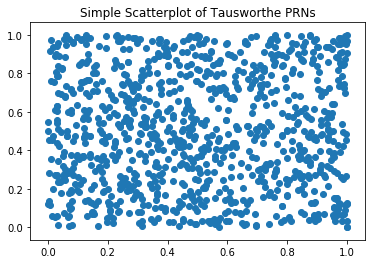

In [67]:
#scatterplot of 1000 pairs of PRNs
pair_list = []
for i in range(1, 1000):
    x = prns[i-1]
    y = prns[i]
    pair = [x,y]
    pair_list.append(pair)
data = np.array(pair_list)
x,y = data.T
plt.scatter(x,y)
plt.title("Simple Scatterplot of Tausworthe PRNs")
plt.show()

I only used the first 1000 PRNs because the full list of PRNs overwhelms the plot and makes it impossible to find any patterns. From this sample of the random numbers produced by the generator, there do not appear to be any patterns, which supports the quality and randomness of this generator. 

Plot a 3D plot of a sample of the PRNs to see if there are any patterns in the data. 

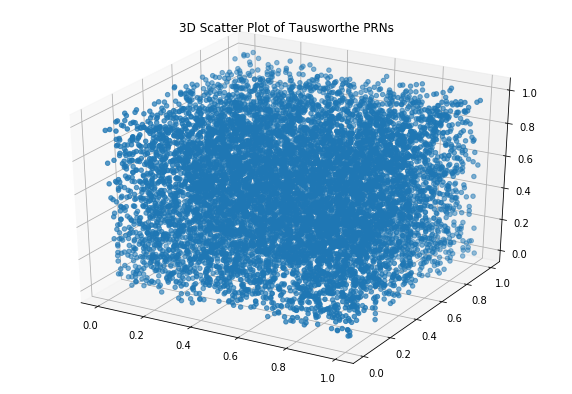

In [51]:
# 3D plot of 10000 pairs of PRNs 
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

pair_list = []
for i in range(1, 10000):
    x = prns[i-2]
    y = prns[i-1]
    z = prns[i]
    pair = [x,y,z]
    pair_list.append(pair)
data3 = np.array(pair_list)
x,y,z = data3.T
ax.scatter3D(x, y, z)
plt.title("3D Scatter Plot of Tausworthe PRNs")
plt.show()

## Goodness of Fit Test

### Chi-Square Goodness of Fit Test

Use a chi-square goodness of fit test to check if the generated PRNs are uniform. 

In [61]:
# chi square goodness of fit test
# since we have a very large n, we can use an approximation of the chi square test 
# equation from lecture notes, week 8 module 6 
k = 1000

chi = (k-1)*(1-(2/(9*(k-1)) + 1.96*(math.sqrt(2/(9*(k-1))))))**3
chi_test = 1074.679
print(chi)
chi < chi_test

913.2979686734454


True

Since we have a very large number n, we can use the approximation of the chi square test. I used k = 1000, and an alpha level 0f 0.05. The chi-square critical value for alpha = 0.05 and k = 999 is approximately 1074.679 according to the chi-square table. The chi-square goodness of fit approximation test statistic is 913.298, which is less than the critical value, so we fail to reject the H0 that the observations are uniform, and conclude that the random numbers generated from the Tausworthe generator are uniformly distributed. 

## Independence Testing 

### Runs Above and Below the Mean Test

Using a runs above and below the mean test for testing for independence of the PRNs.

In [76]:
# runs above and below the mean test 
# code partially adopted from 
# https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/
# equation for Z0 from https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node44.html
def runsTest(l, l_mean):
    runs = 0 
    above = 0 
    below = 0
    for i in range(len(l)):
        if (l[i] >= l_mean and l[i-1] < l_mean) or (l[i] < l_mean and l[i-1] >= l_mean):
            runs += 1  
        if(l[i]) >= l_mean:
            above += 1   
        else:
            below += 1   
    z_num = (runs - (2*above*below/len(l)) - 0.5) 
    z_a = (2*above*below) * (2*above*below - len(l))
    z_b = ((len(l))**2) * (len(l) - 1)
    z_denom = math.sqrt(z_a/z_b)
    z0 = z_num/z_denom
    return z0

prn_mean= statistics.mean(prns)
  
Z = abs(runsTest(prns, prn_mean))
  
print('Z0 =', Z)

Z0 = 0.6190378100381351


Using an alpha level of 0.05, we have a Z-critical value of 1.96, and since the Z-statistic from the runs above and below the mean test is 0.619, we fail to reject the hypothesis, and conclude that the observations are independent. 

### Correlation Test

Another way to test for independence is to look use a correlation test to check for correlation between PRNs. 

In [27]:
# correlation test 
def correlation_test(l):
    cor = 0
    for k in range(len(l)-1):
        cor += l[k]*l[k+1]
    test = 12/(len(l)-1)
    final = (test*cor) - 3
    var_p = (13*len(l) - 19)/((len(l)-1)**2)
    z = final/math.sqrt(var_p)
    return z
correlation_test(prns)

0.8137522940031082

Again using an alpha level of 0.05, the Z-critical value is 1.96. The correlation test statistic is 0.814, so we fail to reject the null hypothesis that the PRNs are independent, and conclude that the PRNs are independent and uncorrelated. 

## Generate Normal Deviates 

Generate Normal deviates from the uniform PRNs produced by the Tausworthe generator, and plot the histogram to check for a normal distribution.

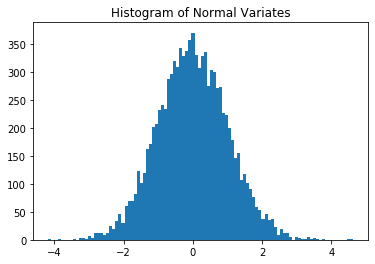

In [68]:
# define function to produce normal deviates from PRNs
# plot histogram of normal deviates to visualize the distribution
def normal(p_l):
    norms = []
    for i in range(10000):
        u = p_l[i]
        n = norm.ppf(u)
        norms.append(n)
    return norms

normal_variates = normal(prns)
plt.hist(normal_variates, 100)
plt.title("Histogram of Normal Variates")
plt.show()

Using Scipy's statistics package, the norm function returns a normal continuous random variable using the inverse of the CDF, which is an implementation of the Inverse Transform method. I used this built in method because the standard normal distribution cdf does not have an analytical form. I used 10,000 random numbers generated from my Tausworthe generator to produce 10,000 normal random variates, and plotting their histogram to visualize the variates. This histogram shows that the 10,000 produced variates approximately follow a normal distribution, centered about 0. 